# Random Forest summary

Alex Koiter

## Load libraries

In [ ]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(patchwork)
  library(gt)
})

In [ ]:
imp_data <- read_csv(here::here("./notebooks/importance_data.csv")) %>%
  rename("Terrain Attribute" = "Var.Names") %>%
  mutate(`Terrain Attribute` = fct_recode(`Terrain Attribute`, "Elevation" = "elevation", 
                                          "Catchment Area" = "catchment_area",
                                          "Plan Curvature" = "plan_curvature",
                                          "Profile Curvature" = "profile_curvature",
                                          "Rel. Slope Position" = "relative_slope_position",
                                          "SAGA Wetness Index" = "saga_wetness_index",
                                          "Vert. Dist. Channel" = "channel_network_distance")) %>%
  mutate(`Terrain Attribute` = fct_relevel(`Terrain Attribute`, "Elevation", "SAGA Wetness Index", "Rel. Slope Position", "Vert. Dist. Channel","Catchment Area", "Profile Curvature", "Plan Curvature")) %>%
  mutate(property = fct_recode(property, "italic(`a*`)" = "a_col", "italic(`b*`)" = "b_col", "italic(`c*`)" = "c_col", "italic(`h*`)" = "h_col", "italic(`x`)" = "x_col")) %>%
  mutate(property = fct_relevel(property, "Ca", "Co", "Cs", "Fe", "Li", "La", "Nb", "Ni", "Rb", "Sr", "italic(`a*`)", "italic(`b*`)", "italic(`c*`)", "italic(`h*`)", "italic(`x`)"))

Rows: 175 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Var.Names, site, property
dbl (4): %IncMSE, IncNodePurity, MSE_rank, Purity_rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'Terrain Attribute'. You can override using
the `.groups` argument.

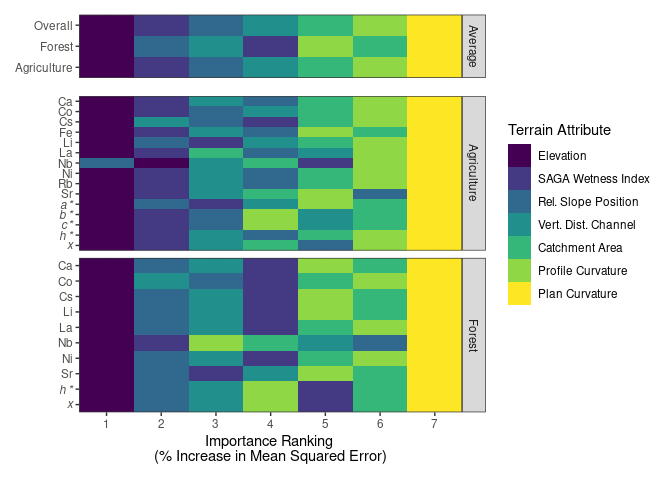

In [ ]:
#| label: fig-RF-results
#| fig-cap: Heat map of the Random Forest regresssion results showing the ranking of the importance of terrain attributes (based on % increase in Mean Squared Error) in explaining the spatial variabilty of selected colour and geochemical properties within the agricultural and forested sites. Top panel shows an average ranking for each site and across both sites.

g2 + g1 + plot_layout(ncol = 1, heights = c(2, 10), guides = "collect") & theme(legend.position = 'right')

In [ ]:
#| label: tbl-RF-summary
#| tbl-cap: Model summary and performance statistics for the random forest regression using the training, validation, and test data sets.

read_csv(here::here("./notebooks/model_performance_data.csv")) |>
  mutate(property = fct_recode(property, "a*" = "a_col", "b*" = "b_col", "c*" = "c_col", "h*" = "h_col", "x" = "x_col")) |>
  mutate(property = fct_relevel(property, "Ca", "Co", "Cs", "Fe", "Li", "La", "Nb", "Ni", "Rb", "Sr", "a*", "b*", "c*", "h*", "x")) |>
  mutate(Var_exp = Var_exp *100,
         Var_exp_test = Var_exp_test *100) |>
  arrange(property) |>
  group_by(site) |>
  gt() |>
  cols_move_to_start(columns = property) |>
  tab_spanner(label = "Training", columns = c("MSE", "Var_exp")) |>
  tab_spanner(label = "Validation", columns = c("MSE_test", "Var_exp_test")) |>
  tab_spanner(label = "Testing", columns = "R2") |>
  fmt_number(columns = c("MSE_test", "MSE"), decimal = 3) |>
  fmt_number(columns = c("Var_exp_test", "Var_exp"), decimal = 1) |>
  fmt_number(columns = c("R2"), decimal = 2) |>
  tab_style(style =  cell_text(weight = "bold", align = "center"), locations =  cells_row_groups()) |>
  tab_style(style =  cell_text(align = "left"), locations =  cells_body()) |>
  tab_style(style =  cell_text(weight = "bold", align = "left"), locations =  cells_column_labels()) |>
  cols_label(Var_exp = md("% Var<br>explained"), Var_exp_test = md("% Var<br>explained"), MSE_test = "MSE", R2 = "{{R^2}}", property = "Property") |>
  row_group_order(groups = c("Agriculture", "Forest"))  |>
  tab_style(
    style = list(cell_text(style = "italic")),
    locations = cells_body(
      columns = property,
      rows = property %in% c("a*", "b*", "c*", "h*", "x")))

Rows: 25 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): site, property
dbl (5): MSE, Var_exp, MSE_test, Var_exp_test, R2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Property 
 
 Training 
 
 
 Validation 
 
 
 Testing 
 
 
 
 MSE 
 % Var explained 
 MSE 
 % Var explained 
 R 2 
 
 
 
 
 Agriculture 
 
 Ca 
 0.374 
 91.6 
 0.359 
 91.8 
 0.91 
 Co 
 0.089 
 79.8 
 0.080 
 82.5 
 0.80 
 Cs 
 0.002 
 85.7 
 0.002 
 86.4 
 0.85 
 Fe 
 0.001 
 69.6 
 0.001 
 70.9 
 0.69 
 Li 
 0.538 
 59.3 
 0.533 
 59.8 
 0.64 
 La 
 0.048 
 93.0 
 0.044 
 93.1 
 0.93 
 Nb 
 0.001 
 57.3 
 0.001 
 59.1 
 0.55 
 Ni 
 0.338 
 93.1 
 0.335 
 93.7 
 0.93 
 Rb 
 0.733 
 95.3 
 0.643 
 96.1 
 0.95 
 Sr 
 97.221 
 93.5 
 93.970 
 93.6 
 0.93 
 a* 
 0.007 
 85.0 
 0.006 
 86.9 
 0.85 
 b* 
 0.136 
 72.5 
 0.120 
 75.3 
 0.72 
 c* 
 0.155 
 73.2 
 0.136 
 75.9 
 0.73 
 h* 
 0.000 
 58.3 
 0.000 
 58.6 
 0.56 
 x 
 0.628 
 61.9 
 0.701 
 61.8 
 0.59 
 
 Forest 
 
 Ca 
 0.231 
 61.1 
 0.231 
 60.7 
 0.63 
 Co 
 0.244 
 39.1 
 0.234 
 42.9 
 0.48 
 Cs 
 0.002 
 64.1 
 0.002 
 67.1 
 0.66 
 Li 
 0.278 
 41.3 
 0.282 
 42.0 
 0.46 
 La 
 1.401 
 43.3 
 1.323 
 47.5 
 0.48 
 Nb 
 0.001 
 55.0 
 0.001 
 55.9 
 0.58 
 Ni 
 2.819 
 55.2 
 2.806 
 56.0 
 0.55 
 Sr 
 29.427 
 59.4 
 29.663 
 59.1 
 0.59 
 h* 
 0.001 
 58.8 
 0.001 
 60.3 
 0.62 
 x 
 5.646 
 62.6 
 5.810 
 63.4 
 0.64